In [177]:
import gather_memtier_statistics as gmts
import cut_away_warmup_cooldown as cut
import os, sys
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [178]:
exp6_dir = "/home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350"
outdir = "./graphs"

In [179]:
def gather_single_xputresp(experiment_dir, rep, client_logfiles):
    client_logfile_paths = [os.path.join(experiment_dir, str(rep), client_logfile) for client_logfile in client_logfiles]
    client_metrics = gmts.aggregate_over_clients(client_logfile_paths)

    cut_client_metrics = cut.cut_away_warmup_cooldown(client_metrics, warmup_end, cooldown_start)

    return gmts.aggregate_over_timesteps(cut_client_metrics).loc['mean', ['throughput', 'responsetime']]

In [180]:
def gather_all_rawdata(inputdir, workload, mw_settings, mc_settings, worker_settings, reps, client_logfiles, warmup_end, cooldown_start):
    result_list = []
    for num_mws in mw_settings:
        for num_mcs in mc_settings:
            for num_workers in worker_settings:
                experiment_dir = os.path.join(inputdir, "{}_{}mw{}mc{}workers".format(workload, num_mws, num_mcs, num_workers))
                for rep in range(1, reps+1):
                    xput, resp = gather_single_xputresp(experiment_dir, rep, client_logfiles)
                    result_list.append((num_mws, num_mcs, num_workers, rep, xput, resp))
                    
    df = pd.DataFrame(data=result_list, columns=['MW', 'MC', 'WT', 'rep', 'xput', 'resp'])
    return df

In [181]:
## Data gathering
inputdir = exp6_dir
workload = "readOnly"
metric_name = 'xput'
mw_settings = [1, 2]
mc_settings = [2, 3]
worker_settings = [8, 32]
reps = 3
client_logfiles = client_logfiles = ["client_01_0.log", "client_01_1.log", "client_02_0.log", "client_02_1.log", "client_03_0.log", "client_03_1.log"]
warmup_end = 10
cooldown_start = 72
should_logtransform=True

raw = gather_all_rawdata(inputdir, workload, mw_settings, mc_settings, worker_settings, reps, client_logfiles, warmup_end, cooldown_start)

Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_03_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw2mc8workers/1/client_03_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data

Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/1/client_03_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/1/client_03_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/2/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/2/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_1mw3mc32workers/2/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experimen

Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/2/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/2/client_03_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/2/client_03_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/3/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/3/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp6/6_2k_2017-12-02_211350/readOnly_2mw3mc8workers/3/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data

In [182]:
## Multiplicative Model
# Check ratio of y_max/y_max
ys = raw[metric_name]
print ("Max/Min Ratio", ys.max()/ys.min())

if should_logtransform:
    raw[metric_name] = np.log(raw[metric_name])

Max/Min Ratio 5.38010734165


In [183]:
averages = [(key[0], key[1], key[2], grp[metric_name].mean()) for key, grp in raw.groupby(['MW', 'MC', 'WT'])]

In [184]:
analysis_table = pd.DataFrame(averages, columns=['MW', 'MC', 'WT', 'y_mean'])
analysis_table.insert(0, 'I', 1)

analysis_table['MW'].replace([1, 2], [-1, 1], inplace=True)
analysis_table['MC'].replace([2, 3], [-1, 1], inplace=True)
analysis_table['WT'].replace([8, 32], [-1, 1], inplace=True)

analysis_table.insert(4, 'MWMC', analysis_table['MW'] * analysis_table['MC'])
analysis_table.insert(5, 'MWWT', analysis_table['MW'] * analysis_table['WT'])
analysis_table.insert(6, 'MCWT', analysis_table['MC'] * analysis_table['WT'])
analysis_table.insert(7, 'MWMCWT', analysis_table['MW'] * analysis_table['MC'] * analysis_table['WT'])

In [185]:
effects_names = ['I', 'MW', 'MC', 'WT', 'MWMC', 'MWWT', 'MCWT', 'MWMCWT']
a = analysis_table[effects_names]
b = analysis_table['y_mean']
solution = np.linalg.solve(np.array(a), np.array(b))
effects = pd.DataFrame(data=solution, index=effects_names, columns=['Effects'])

In [186]:
## Allocation of Variation
SSY = (raw[metric_name]**2).sum()
SS_effects = 2**3*3*(solution**2)
SST = SSY - SS_effects[0]
SSE = SSY - 2**3*3*((solution**2).sum())

SS_with_error = np.append(SS_effects[1:], SSE)
pd.DataFrame(SS_with_error/SST*100, index=effects_names[1:] + ["Error"], columns=["Explanatory Effect (%)"])

,Explanatory Effect (%)
MW,22.831996
MC,0.270249
WT,66.306109
MWMC,1.353432
MWWT,7.085474
MCWT,1.568130
MWMCWT,0.301168
Error,0.283442


In [187]:
## Confidence Intervals
confidence_alpha = 0.1 # Take 90 % conf intervals
degrees_of_freedom = (2**3*(reps-1))# From the book
stddev_err = np.sqrt(SSE/degrees_of_freedom)
stddev_effect = stddev_err/np.sqrt(2**3*3)
t_val = stats.t.ppf(1-(confidence_alpha/2),degrees_of_freedom)
confidence_interval_oneside = stddev_effect * t_val

confidence_lowerbound = effects - confidence_interval_oneside
confidence_upperbound = effects + confidence_interval_oneside
effects_wConfIntervals = pd.concat([effects, confidence_lowerbound, confidence_upperbound], axis=1)
effects_wConfIntervals.columns = ['Effect', 'Lower Confidence Bound', 'Upper Confidence Bound']
effects_wConfIntervals

,Effect,Lower Confidence Bound,Upper Confidence Bound
I,9.609991,9.597292,9.622691
MW,0.261146,0.248447,0.273846
MC,0.028411,0.015712,0.041111
WT,0.445030,0.432330,0.457729
MWMC,0.063581,0.050882,0.076281
MWWT,-0.145478,-0.158178,-0.132778
MCWT,0.068439,0.055739,0.081139
MWMCWT,0.029993,0.017293,0.042693


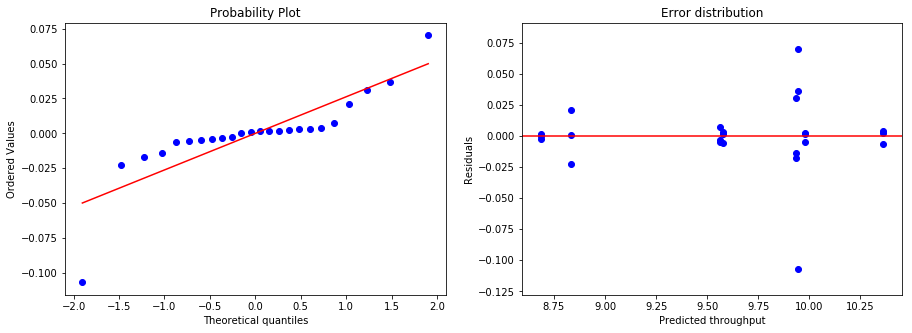

In [188]:
## Check regression assumptions: 

fig, axes = plt.subplots(1, 2, figsize=(15,5))

## QQ-plot
avg = pd.DataFrame(data=averages, columns=['MW', 'MC', 'WT', metric_name])
merged = pd.merge(raw, avg, how='left', on=['MW', 'MC', 'WT'])
errors = merged[metric_name + '_x'] - merged[metric_name + '_y']

stats.probplot(errors, dist="norm", plot=axes[0])

## Pred vs. Resid
predicted = np.dot(a,solution).repeat(reps)
residuals = raw[metric_name] - predicted
axes[1].scatter(predicted, residuals, color='b', marker='o', alpha=1)
axes[1].axhline(y=0, color='r')
axes[1].set_xlabel("Predicted throughput")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Error distribution")
plt.show()
fig.savefig(os.path.join(outdir, "{}_{}_modelassumptions.png".format(workload, metric_name)))